In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./CSVs/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
 df = df.iloc[:,1:]

In [5]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [6]:
import matplotlib.pyplot as plt

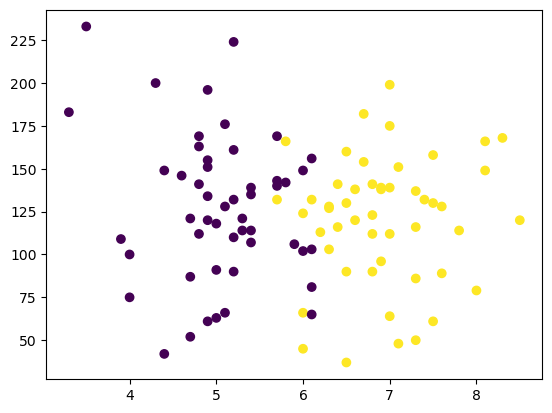

In [7]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'],)

In [8]:
X=df.drop('placement',axis=1)

In [9]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [10]:
Y=df['placement']
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
Scl=StandardScaler()

In [13]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [14]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [15]:
X=Scl.fit_transform(X)
# Y=Scl.fit_transform(Y)       give errror for not have (2 tensor value ) 

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=28)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
LRC=LogisticRegression()

In [19]:
LRC.fit(X_train,Y_train)

LogisticRegression()

In [20]:
pred=LRC.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(pred,Y_test)

0.9

In [25]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

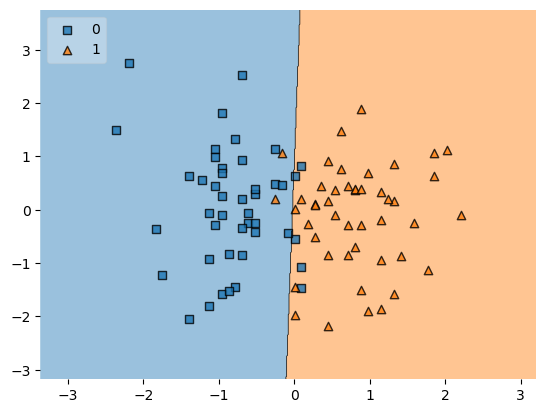

In [28]:
plot_decision_regions(X_train,Y_train.values,clf=LRC,legend=2)

In [30]:
Y_train.values

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [31]:
import pickle

In [37]:
pickle.dump(LRC,open("Model.pkl",'wb'))